<h1 align="center"> Dataset de Fraude Crediticio </h1>

**Nota:** Pueden encontrar más información al respecto en el siguiente link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

Más adelante hablaremos más acerca de Kaggle, pero por ahora les comentamos que es una página donde se suben Dataset y la gente los analiza. En general los datasets están bastante curados y la gente sube los "Kernels" (Notebooks) que usaron para analizarlos. La página está buenísima, recomendamos que exploren los kernels de análisis del Titanic - al menos los de mayor puntaje - y miren las competencias que hay.


<h2> Introducción </h2>
Como se describe en el conjunto de datos, los atributos o features fueron escalados y los nombres de las características no se muestran debido a razones de privacidad. Sin embargo, aún podemos analizar algunos aspectos importantes del conjunto de datos. ¡Empecemos!


<h2> Objetivo: </h2>
<ul>
<li> Comprender la poca distribución de los "pequeños" datos que nos proporcionaron. </li>
<li> Cree una proporción de 50/50 de los datos de transacciones "Fraude" y "Sin Fraude". </li>
<li>Comprender los errores comunes realizados con conjuntos de datos desbalanceados. </li>
</ul>


<h2> Pasos: </h2>
I. <b>Entendiendo el conjuto de datos</b><br>
II. <b>Preprocesamiento</b><br>
III. <b>Submuestreo aleatorio y sobremuestreo (overfitting)</b><br>

<h2> Referencias: </h2>
<ul> 
<li>Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron  </li>
<li><a src="https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s" > Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn </a>by Coding-Maniac</li>
<li><a src="https://www.kaggle.com/lane203j/auprc-5-fold-c-v-and-resampling-methods"> auprc, 5-fold c-v, and resampling methods
</a> by Jeremy Lane (Kaggle Notebook) </li>
</ul>

## Entendiendo nuestro dataset:
<a id="gather"></a>
Lo primero que debemos hacer es entender <b> de modo básico </b>  nuestros datos. Recuerden que, excepto por la <b> Time </b> y la <b> Amount </b>, no sabemos cuáles son las otras columnas (por razones de privacidad). Lo único que sabemos es que esas columnas que son desconocidas ya han sido escaladas.

<h3> Resumen: </h3>
<ul>
<li>El monto de la transacción es relativamente <b> pequeño </b>. La media de todos los montajes realizados es de aproximadamente USD 88.</li>
<li>No hay valores <b> "Null" </b>, por lo que no tenemos que trabajar en formas de reemplazar los valores. </li>
<li> La mayoría de las transacciones fueron <b> Sin Fraude </b> (99.83%) , mientras que las transacciones de <b> Fraude </b> ocurren (017%) en el dataframe</li>
</ul>

<h3> Feature Technicalities: </h3>
<ul>
<li> <b>Transformación de PCA: </b> La descripción de los datos dice que todas las características, excepto "time" y "amount", pasaron por una transformación de PCA  (PCA es una técnica de reducción de dimensionalidad que veremos más adelante. Por ahora, alcanza con saber que PCA toma los features originales y los combina para crear nuevos atributos. Se espera que estos atributos sean más informativos, y un número menor, que los atributos originales).</li>
<li> <b> Escalado: </b> Tenga en cuenta que para implementar una PCA, las características de transformación han sido escaladas previamente. (En este caso, todas las características V se han escalado o, al menos, eso es lo que suponemos que hicieron las personas que desarrollan el conjunto de datos). </li>
</ul>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatche
import time

In [5]:
df = pd.read_csv('Datasets/creditcard.csv')


1- Importar el dataset y mostrar las seis primeras instancias

Y nos fijamos cuántas columnas y cuántas filas tiene del dataset. Por último, averiguamos el nombre de las columnas

In [6]:
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [8]:
df.shape

(284807, 31)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

2-¿Recuerdan lo que hace el comando *.describe()*?¿Y *.info*?

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

3- Verificar que no hay valores nulos

In [14]:
# NO hay valores nulos
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

4- Nos fijamos cuantas casos de Fraude y No Fraude hay en el dataset. Cálcular el porcentaje del mismo

In [99]:
aa = df['Class'].value_counts('1')*100
aa

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [46]:

#sns.set(style ='darkgrid')
#ax = sns.barplot(x="day", y="total_bill", data=tips)
#grafporc = sns.barplot(x = df['Class'].value_counts(), y = "percent",data=df['Class'])


5- Gráfiquemos un histograma de estas clases. Completar el código donde dice None

Text(0.5, 1.0, 'Clases \n (1: Fraude ||0: Sin Fraude )')

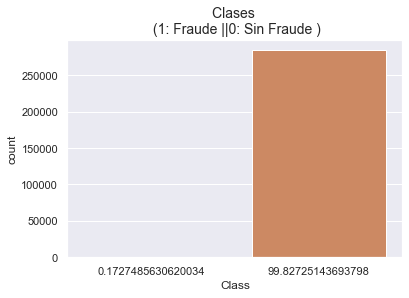

In [107]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x=df['Class'], data=aa)
#df['Class']..hist(bins=2)
plt.title('Clases \n (1: Fraude ||0: Sin Fraude )', fontsize=14)

**Distribuciones**: Al ver las distribuciones podemos tener una idea de cuán sesgadas están estas características, también podemos ver distribuciones adicionales de las otras características. Existen técnicas que pueden ayudar a que las distribuciones estén menos sesgadas.

6- a- Gráficar la distribución de los datos de la columna Amount y Time con displot. Usar subplot y poner los siguientes títulos: 'Distribución de Amount' y 'Distribución de Time', con un tamaño de letra de 14. También deben usar xlim para que reducir el rango de datos del eje x en función del valor mayor y menor de cada variable 

In [108]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


**Para pensar**:¿Se puede mejorar la visualización de la distribución de los montos?¿Qué es una escala logarítmica?¿Qué se puede interpretar de la distribución del tiempo de la transacción?¿Qué ocurre con los valores en el eje y?¿Por qué son tan chicos?

6- b- Ahora veamos si hay alguna la variación de la cantidad registrada de las transacciones a lo largo del tiempo

**comentario**: Vemos aquí algunos valores atípicos (transacciones con valores realmente altos) pero podemos ver con el diagrama de la segunda fila que esos valores atípicos no están relacionados con transacciones fraudulentas. Otra cosa aquí que es importante ver es que tal vez la columna Tiempo no sea representativa de la clasificación de fraude.

<h2> Distribución </h2>
<a id="distributing"> </a>

<h3> ¿Qué es una submuestra? </h3>
En este escenario, nuestra submuestra será un dataframe con una relación 50/50 de transacciones fraudulentas y no fraudulentas. Es decir, nuestra submuestra tendrá la misma cantidad de transacciones fraudulentas y no fraudulentas.

<h3> ¿Por qué creamos una submuestra? </h3>
¡Al comienzo vimos que el dataframe original estaba muy desequilibrado! El uso del dataframe original causará los siguientes problemas:
<ul>
<li> <b> Sobreajuste: </b> ¡Nuestros modelos de clasificación supondrán que en la mayoría de los casos no hay fraudes! Lo que queremos para nuestro modelo es estar seguros cuando ocurre un fraude. </li>
<li> <b> Correlaciones incorrectas: </b> Aunque no sabemos qué significan las características "V", será útil comprender cómo cada una de estas características influye en el resultado (Fraude o No Fraude) al tener un marco de datos de desequilibrio no podemos ver las correlaciones verdaderas entre la clase y las características. </li>
</ul>
<h3> Resumen: </h3>
<ul>
<li> Hay <b> 492 casos </b> de fraude en nuestro conjunto de datos para que podamos obtener aleatoriamente 492 casos de no fraude para crear nuestro nuevo subcuadro de datos. </li>
<li> Concatenamos los 492 casos de fraude y no fraude, <b> creando una nueva submuestra. </b> </li>
</ul>

## Submuestreo aleatorio:
En esta fase del proyecto implementaremos * "Random Under Sampling" * que básicamente consiste en eliminar datos para tener un <b> conjunto de datos más balanceado </b> y así evitar que nuestros modelos se sobreajusten.

#### Pasos:
<ul>
<li> Lo primero que tenemos que hacer es determinar qué tan <b> desbalanceado </b> es nuestra clase (use "value_counts ()" en la columna de clase para determinar la cantidad para cada etiqueta) </li>
<li> Una vez que determinamos cuántas instancias se consideran <b> transacciones fraudulentas </b> (Fraud = "1"), debemos llevar las <b> transacciones no fraudulentas </b> a la misma cantidad que las transacciones fraudulentas (suponiendo que queremos una relación de 50/50), esto será equivalente a 492 casos de fraude y 492 casos de transacciones sin fraude. </li>
<li> Después de implementar esta técnica, tenemos una submuestra de nuestro marco de datos con una relación de 50/50 con respecto a nuestras clases.
</ul>

In [117]:
# Como nuestras clases están muy sesgadas, debemos hacerlas equivalentes para tener una distribución normal de las clases.

df = df.sample(frac=1)

# cantidad de clases de fraude 492 filas.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Mezclar filas del dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141870,84512.0,-1.751693,1.844155,0.371948,1.129114,-0.868091,0.052676,-0.588521,1.497187,-0.770180,...,0.176747,0.293751,0.008971,0.219167,-0.103294,-0.318409,-0.230550,-0.006088,7.62,0
151103,94625.0,1.707857,0.024881,-0.488140,3.787548,1.139451,2.914673,-0.743358,0.699136,1.008471,...,0.010865,0.548258,0.091218,-1.007959,-0.082183,0.179709,0.007738,-0.068841,33.76,1
154524,101832.0,-0.545460,1.302166,-0.404277,-0.838782,1.262666,-0.467569,1.327016,-0.319891,1.242305,...,-0.181272,0.002890,-0.232348,0.269919,-0.118254,0.546684,0.287232,0.267670,25.00,0
41569,40742.0,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,...,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1.00,1
68067,52814.0,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,...,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,519.90,1


**Para pensar**: porque estoy usando shufle? Explicar

7- Realizar un histograma para cada variable

##  Correlación:
<a id="correlating"> </a>
Ahora que tenemos nuestro marco de datos correctamente balanceado, podemos ir más allá con nuestro <b> análisis </b> y <b> preprocesamiento de datos </b>.

Distribución de las clases en la submuestra
1    0.5
0    0.5
Name: Class, dtype: float64


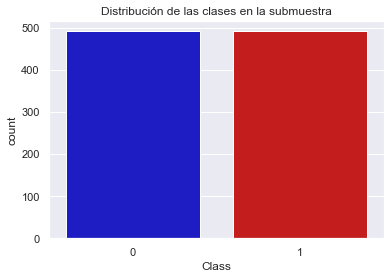

In [110]:
print('Distribución de las clases en la submuestra')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title(u'Distribución de las clases en la submuestra')
plt.show()

<h3> Matrices de correlación </h3>
Las matrices de correlación son la esencia de la comprensión de nuestros datos. Queremos saber si hay características que influyen mucho en si una transacción específica es un fraude. Sin embargo, es importante que usemos el marco de datos correcto (submuestra) para que podamos ver qué características tienen una alta correlación positiva o negativa con respecto a las transacciones de fraude.



**Nota:** Tenemos que asegurarnos de usar la submuestra en nuestra matriz de correlación o nuestra matriz de correlación se verá afectada por el alto desequilibrio entre nuestras clases. Esto ocurre debido al desbalanceo de las clases en el dataframe original.

8- Cálcular  y Gráficar la matriz de correlación del dataframe original y de la submuestra. Ayuda:usar heatmap. Completar el código donde dice None

In [122]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr() #Dataframe original
df.(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title(u"Matriz de correlación desbalanceada (No usar de referencia)", fontsize=14)


sub_sample_corr = new_df.corr() #Dataframe balanceado
None(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title(u'Matriz de correlación desbalanceada (Usar de referencia)', fontsize=14)
plt.show()

SyntaxError: invalid syntax (<ipython-input-122-1e48e89460a7>, line 4)

**Pregunta**: Cúales variables están correlacionadas positivamente y negativamente? Hacer un análisis de la matriz de correlación. Se les ocurre otro gráfico para ver 

<b> BoxPlots: </b> Utilizaremos boxplots para comprender mejor la distribución de estas características en transacciones fraudulentas y no fradulentas. </li>
</ul>

8- Seleccionar las variables V que estan negativamente correlacionadas y hacer un boxplot para cada una de ellas en función de la clase (Fraude y Sin Fraude). Gráficar usando subplot.

A modo de ayuda escribimos un ejemplo para una de estas variables.

Text(0.5, 1.0, 'V17 vs Class Negative Correlation')

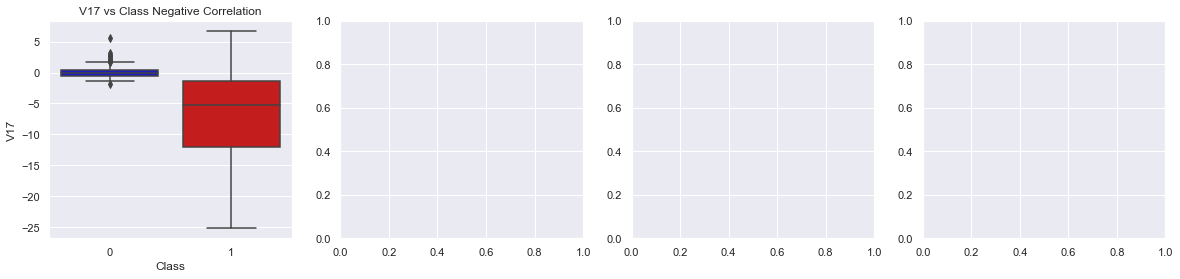

In [112]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title(u'V17 vs Class Negative Correlation')


9- Seleccionar las variables V que estan negativamente correlacionadas y hacer un boxplot para cada una de ellas en función de la clase (Fraude y Sin Fraude). Gráficar usando subplot.

A modo de ayuda escribimos un ejemplo para una de estas variablles.

Text(0.5, 1.0, 'V17 vs Class Negative Correlation')

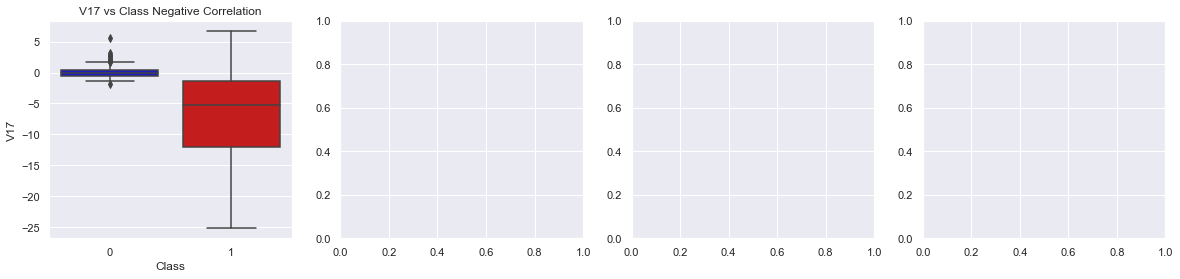

In [113]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title(u'V17 vs Class Negative Correlation')


**EXTRA**

El gráfico de violín con división entre datos de fraude y datos normales mostrará algunas distinciones de las distribuciones de variables V, y estas variables V son las claves para clasificar los registros de fraude

Conocen otro ejemplo que presente clases muy desbalanceadas ?

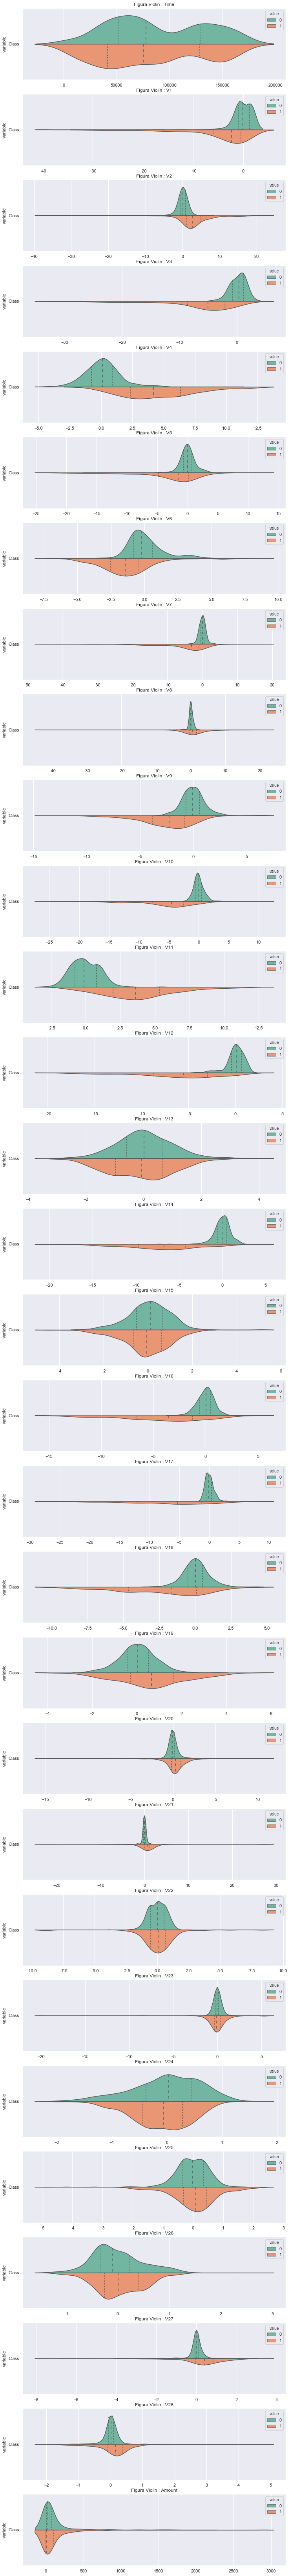

In [115]:
import matplotlib.gridspec as gridspec
dt = 'float64'
sel_col = new_df.columns[new_df.dtypes==dt]

plt.figure(figsize=(12,len(sel_col)*4))
gs = gridspec.GridSpec(len(sel_col),1)
for i, cn in enumerate(new_df[sel_col]):
    ax = plt.subplot(gs[i])
    data_1  = pd.concat([new_df[cn], new_df.Class], axis=1)
    data_2  = pd.melt(data_1,id_vars=cn)
    sns.violinplot( x=cn, y='variable', hue="value"
                   ,data=data_2, palette="Set2", split=True
                   ,inner="quartile")
    ax.set_xlabel('')
    ax.set_title(u'Figura Violin : ' + str(cn))
plt.show()